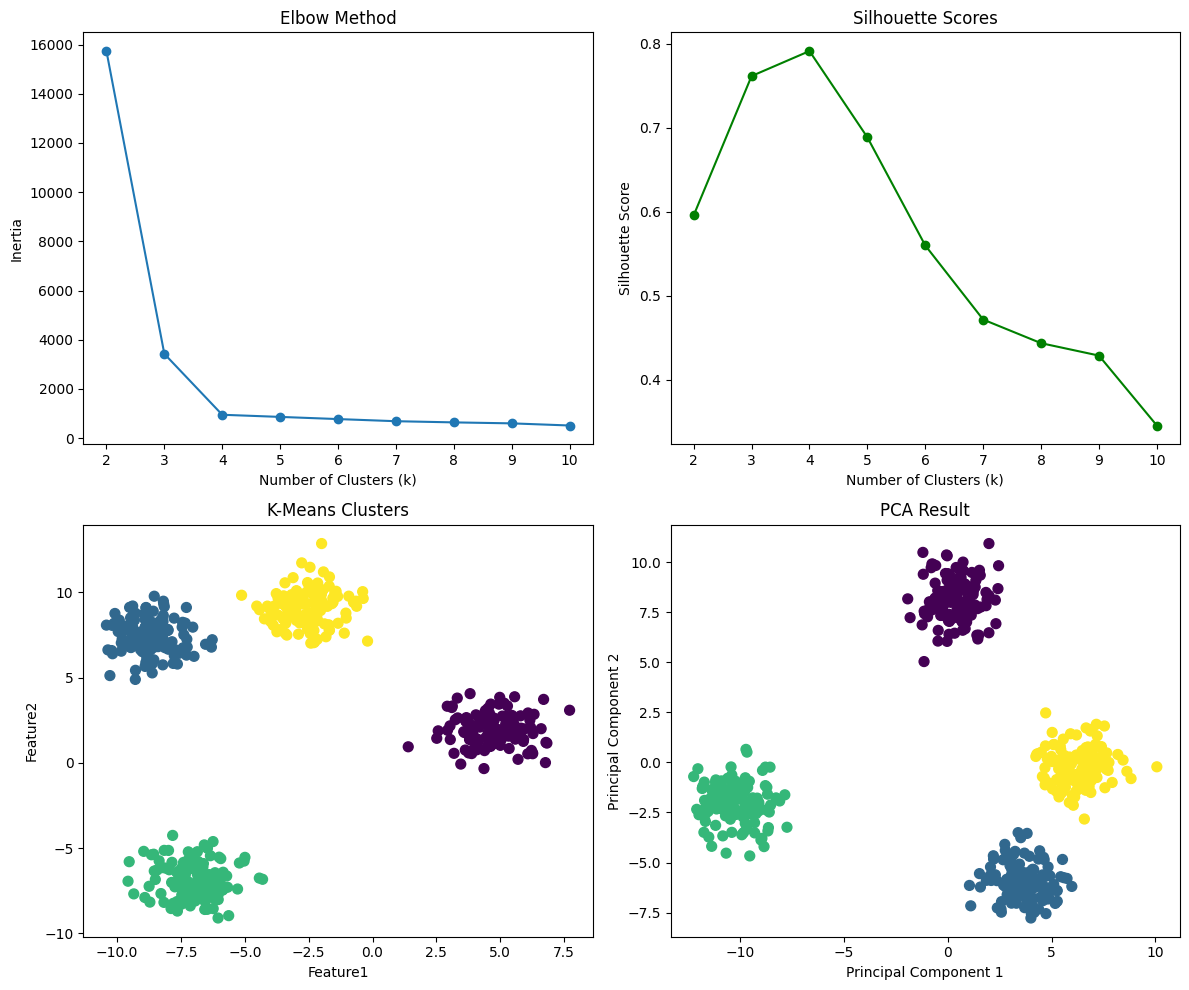

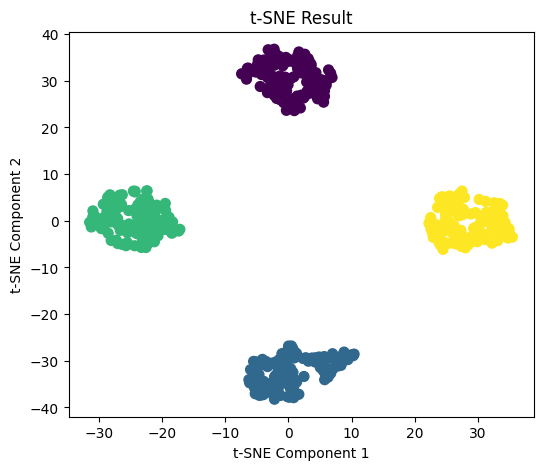

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Generate synthetic data
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

# Elbow method & silhouette score for optimal k
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Trying cluster counts from 2 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting elbow and silhouette curves
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(2, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Choosing an optimal number of clusters (e.g., 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X)

# Plotting K-Means clustering on the original features
plt.subplot(2, 2, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title('K-Means Clusters')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

# PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.subplot(2, 2, 4)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# t-SNE for another visualization of the clusters
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50)
plt.title('t-SNE Result')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()